<a href="https://colab.research.google.com/github/NoeliaDuranL/SIS420/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1 - Duran Llaveta Noelia Paola

Se implementa la regresion lineal multivariable al dataset Property sales:Melbourne City.

Para X se toman 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Price'

Mientras que para y se toma 'Price'

El objetivo es predecir el precio de las propiedades en la ciudad de Melbourne tomando en cuenta la cantidad de habitaciones, distancia al centro de la ciudad, nro de habitaciones, baños y autos.

Link github:


In [5]:
import os
import numpy as np
from matplotlib import pyplot
#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd
from tabulate import tabulate

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Leer datos
df = pd.read_csv('/content/drive/MyDrive/SIS420/datasets/Property Sales of Melbourne City.csv', delimiter=',')


# Procesamiento de datos

Se procesaron los datos del dataset puesto que existían varias filas Nan

In [14]:
# Obtener la cantidad de datos no nulos en cada columna
column_counts_before = df.count()

# Imprimir la cantidad de datos en cada columna
print("Cantidad de datos en cada columna: ")
print(column_counts_before)

Cantidad de datos en cada columna: 
Unnamed: 0       18396
Suburb           18396
Address          18396
Rooms            18396
Type             18396
Price            18396
Method           18396
SellerG          18396
Date             18396
Distance         18395
Postcode         18395
Bedroom2         14927
Bathroom         14925
Car              14820
Landsize         13603
BuildingArea      7762
YearBuilt         8958
CouncilArea      12233
Lattitude        15064
Longtitude       15064
Regionname       18395
Propertycount    18395
dtype: int64


In [15]:
# Seleccionar las columnas necesarias para X y y
selected_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Price']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_selected = df[selected_columns]

# Mostrar las primeras filas del nuevo DataFrame
print(df_selected.head())

   Rooms  Distance  Bedroom2  Bathroom  Car    Price
0      2       2.5       2.0       1.0  1.0  1480000
1      2       2.5       2.0       1.0  0.0  1035000
2      3       2.5       3.0       2.0  0.0  1465000
3      3       2.5       3.0       2.0  1.0   850000
4      4       2.5       3.0       1.0  2.0  1600000


In [16]:
# Eliminar filas con valores NaN
df_selected = df_selected.dropna()

# Mostrar la cantidad de filas y columnas después de eliminar los NaN
print("Cantidad de filas y columnas después de eliminar NaN:", df_selected.shape)

# Mostrar las primeras filas del nuevo DataFrame
print(df_selected.head())


Cantidad de filas y columnas después de eliminar NaN: (14820, 6)
   Rooms  Distance  Bedroom2  Bathroom  Car    Price
0      2       2.5       2.0       1.0  1.0  1480000
1      2       2.5       2.0       1.0  0.0  1035000
2      3       2.5       3.0       2.0  0.0  1465000
3      3       2.5       3.0       2.0  1.0   850000
4      4       2.5       3.0       1.0  2.0  1600000


In [17]:
# Contar valores NaN en el DataFrame
nan_count = df_selected.isna().sum()

# Mostrar la cantidad de NaN por columna
print("Cantidad de NaN por columna:")
print(nan_count)


Cantidad de NaN por columna:
Rooms       0
Distance    0
Bedroom2    0
Bathroom    0
Car         0
Price       0
dtype: int64


Para X se tomaron Rooms, Distance, Bedroom2, Bathroom y Car

Para Y se tomó Price

# Lectura de datos

In [18]:
# columnas relevantes para X
features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
X = df_selected[features].values

# Phising' para y
y = df_selected['Price'].values

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(df_selected))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Asignar X_train y y_train a X y y respectivamente
X = X_train
y = y_train
m_train = len(y_train)

m = y.size

In [19]:
X.shape

(11856, 5)

# Normalización

In [20]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [21]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 2.   2.5  2.   1.   1. ]
 [ 2.   2.5  2.   1.   0. ]
 [ 3.   2.5  3.   2.   0. ]
 ...
 [ 3.  10.5  3.   1.   2. ]
 [ 3.  10.5  3.   2.   1. ]
 [ 4.  10.5  4.   2.   2. ]]
Media calculada: [2.88815789 9.6247554  2.86150472 1.51678475 1.57059717]
Desviación estandar calculada: [0.96014091 5.34431228 0.97049031 0.69061204 0.94870598]
[[-0.9250287  -1.33314728 -0.88770049 -0.74829965 -0.60144785]
 [-0.9250287  -1.33314728 -0.88770049 -0.74829965 -1.6555152 ]
 [ 0.1164851  -1.33314728  0.1427065   0.69969132 -1.6555152 ]
 ...
 [ 0.1164851   0.16377123  0.1427065  -0.74829965  0.45261951]
 [ 0.1164851   0.16377123  0.1427065   0.69969132 -0.60144785]
 [ 1.15799889  0.16377123  1.17311349  0.69969132  0.45261951]]


# Graficación de datos

In [23]:
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro')
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

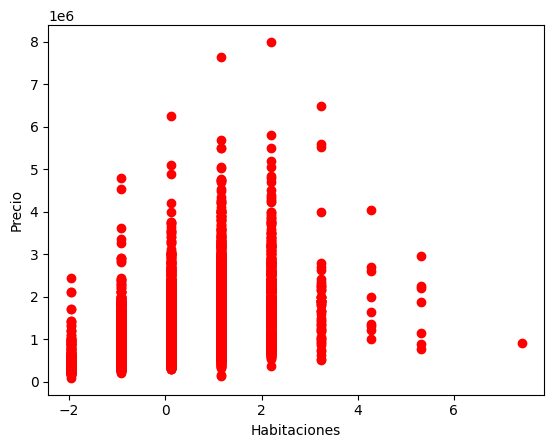

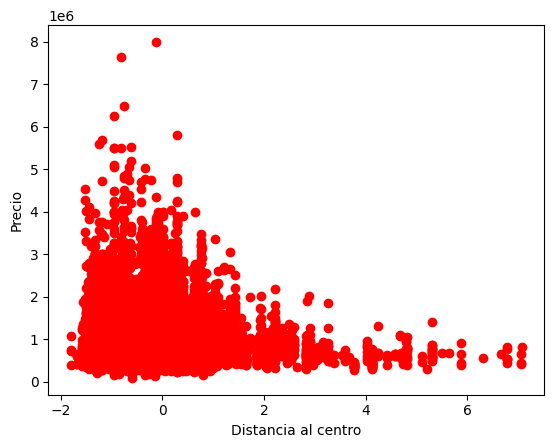

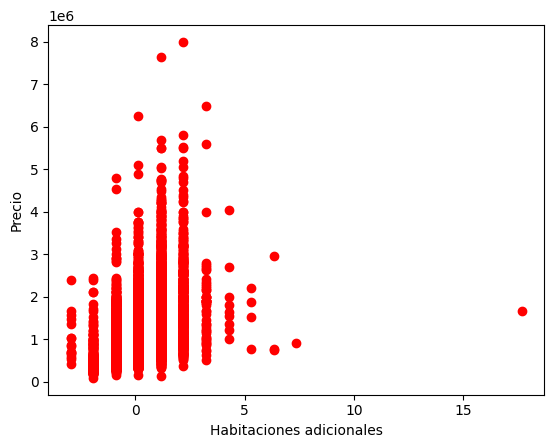

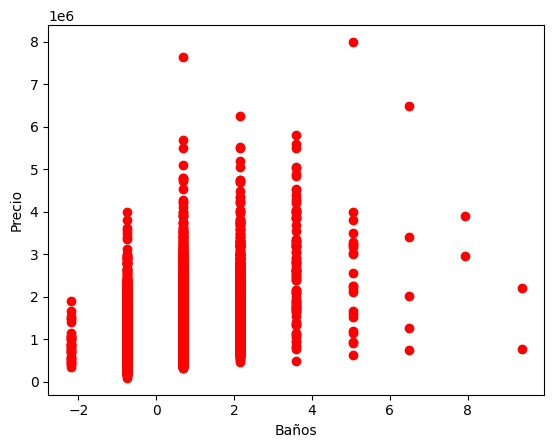

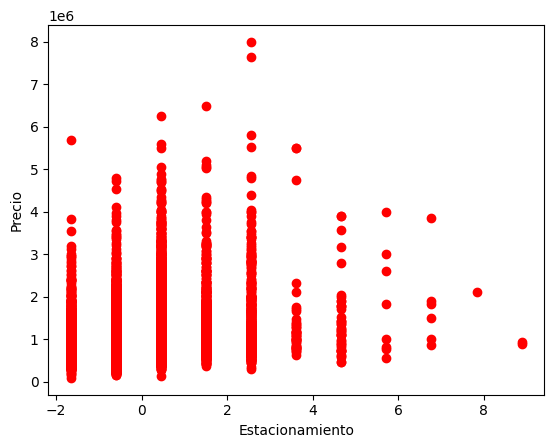

In [25]:
# Definir etiquetas para los ejes x e y
xlabel1 = "Habitaciones"
xlabel2 = "Distancia al centro"
xlabel3 = "Habitaciones adicionales"
xlabel4 = "Baños"
xlabel5 = "Estacionamiento"
ylabel1 = "Precio"

# Graficar la relación entre Habitaciones y Precio
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)

# Graficar la relación entre Distancia al centro y Precio
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)

# Graficar la relación entre Habitaciones adicionales y Precio
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)

# Graficar la relación entre Baños y Precio
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)

# Graficar la relación entre Estacionamiento y Precio
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)

# Calculo de costos

In [30]:
# Concatenar una columna de unos a la matriz X_norm
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [32]:
def calcularCosto(X, y, theta):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [52]:
# Definir un theta inicial para el cálculo del costo
theta = np.array([0.2, 0.34, 0.1, 0.1, 0.3, 0.9])

# Calcular el costo utilizando la función calcularCosto
JJ = calcularCosto(X_ready, y, theta)
print(f"Con theta: {theta}, se obtiene un costo de: {JJ}")

Con theta: [0.2  0.34 0.1  0.1  0.3  0.9 ], se obtiene un costo de: 773226341215.7443


# Calculo descenso gradiente

In [34]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Los valores de theta calculados son: [1067442.51390758  191224.06548113 -204893.42976375   92022.16590208
  149712.26889009   53227.47709967]
Con un costo final de: 120569199711.05617


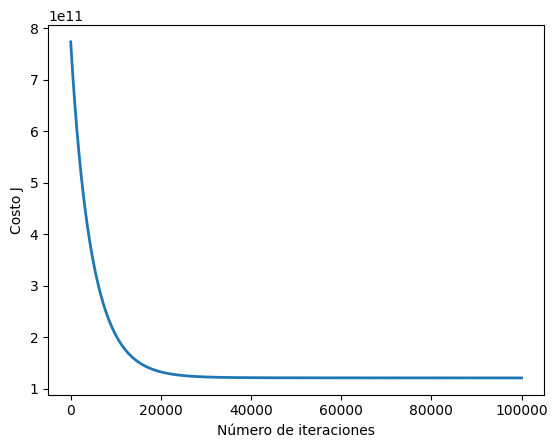

In [36]:
# Inicializar theta con ceros
theta = np.zeros(X_ready.shape[1])

# Definir el número de iteraciones y el tamaño de paso (alpha)
num_ite = 100000
alpha = 0.0001

# Calcular los valores de theta utilizando el descenso del gradiente
theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)

# Imprimir los valores de theta y el último costo
print(f"Los valores de theta calculados son: {theta}")
print(f"Con un costo final de: {J_historico[-1]}")

# Graficar la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()

# Grafica de la regresión lineal

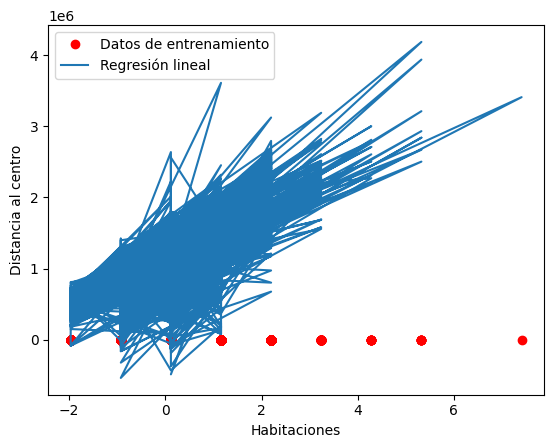

In [38]:
# Graficar los datos de entrenamiento y la regresión lineal
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)
pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])
pyplot.show()

In [40]:
# prompt: df_cleaned tail

df_selected.tail()


,Rooms,Distance,Bedroom2,Bathroom,Car,Price
18391,2,6.8,2.0,2.0,1.0,622500
18392,4,6.8,4.0,1.0,5.0,2500000
18393,4,12.7,4.0,3.0,2.0,1100000
18394,4,6.3,4.0,1.0,1.0,1285000
18395,4,6.3,4.0,2.0,2.0,1050000


In [41]:
# Definir las características de la propiedad para la predicción
caracteristicas_prediccion = [1, 4, 6.3, 4.0, 2.0, 2.0]  # Se agrega 1 al inicio para el término de sesgo

# Realizar la predicción
y_pred = np.dot(caracteristicas_prediccion, theta)

# Imprimir el precio predicho
print("El precio predicho de la propiedad es:", y_pred)

El precio predicho de la propiedad es: 1315478.3239082983


# Ecuación de la normal

In [42]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [45]:
# Concatenar una columna de unos a la matriz X_norm
X_ren = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [46]:
# Calcular los valores de theta utilizando la ecuación normal
theta = calcularThethaEcuacionNormal(X_ren, y)
print(f"Los valores de theta calculados son: {theta}")


Los valores de theta calculados son: [1067490.95369433  247630.89363138 -204985.58813116   36430.24618867
  148623.68352403   53070.72815954]


In [47]:
# Definir las características de la propiedad para la predicción
X_array = [1, 4, 6.3, 4.0, 2.0, 2.0]  # Se agrega 1 al inicio para el término de sesgo

# Realizar la predicción utilizando los valores de theta
price = np.dot(X_array, theta)
print('Precio predicho para una casa con 2305 habitaciones, 4 de distancia al centro y 1 de estacionamiento (usando la ecuación normal): ${:.0f}'.format(price))

Precio predicho para una casa con 2305 habitaciones, 4 de distancia al centro y 1 de estacionamiento (usando la ecuación normal): $1315715


# Regresión Polinómica

In [53]:
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [55]:
# Tomar todas las filas de tu DataFrame df_selected
X = df_selected[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car']].values
y = df_selected['Price'].values

# Función para graficar los datos
def plotData(X, y):
    fig, axs = pyplot.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    axs = axs.ravel()

    for i in range(X.shape[1]):
        axs[i].scatter(X[:, i], y, marker='o', color='blue')
        axs[i].set_xlabel('Feature {}'.format(i+1))
        axs[i].set_ylabel('Price')

    pyplot.tight_layout()


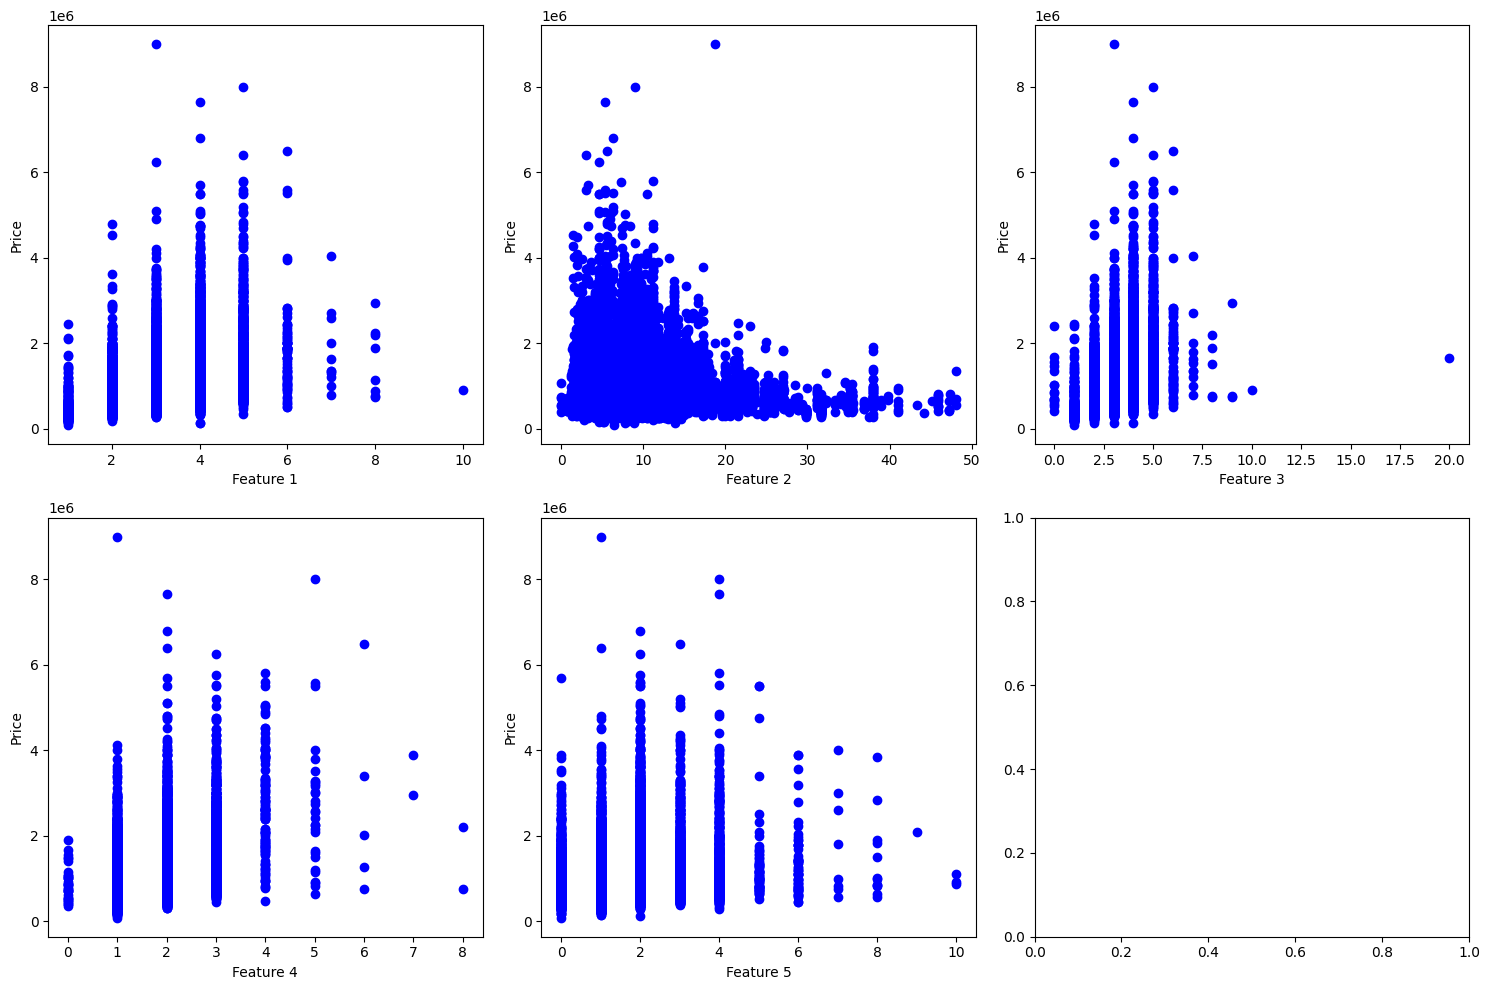

In [56]:
# Llamar a la función para graficar los datos
plotData(X, y)
pyplot.show()

In [57]:
X = np.concatenate([X, X * X], axis=1)

In [58]:
print(X)

[[ 2.   2.5  2.  ...  4.   1.   1. ]
 [ 2.   2.5  2.  ...  4.   1.   0. ]
 [ 3.   2.5  3.  ...  9.   4.   0. ]
 ...
 [ 4.  12.7  4.  ... 16.   9.   4. ]
 [ 4.   6.3  4.  ... 16.   1.   1. ]
 [ 4.   6.3  4.  ... 16.   4.   4. ]]


In [59]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [60]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [68]:
X_norm

array([[-0.97923261, -1.29482737, -0.94776779, ..., -0.78713764,
        -0.6359034 , -0.5185534 ],
       [-0.97923261, -1.29482737, -0.94776779, ..., -0.78713764,
        -0.6359034 , -0.72403365],
       [ 0.06654294, -1.29482737,  0.08837256, ..., -0.06193126,
         0.39608175, -0.72403365],
       ...,
       [ 1.11231848,  0.39060356,  1.12451291, ...,  0.95335769,
         2.11605699,  0.09788735],
       [ 1.11231848, -0.66692173,  1.12451291, ...,  0.95335769,
        -0.6359034 , -0.5185534 ],
       [ 1.11231848, -0.66692173,  1.12451291, ...,  0.95335769,
         0.39608175,  0.09788735]])